# How do we pull data into python using hive?
####  It should be the same as pulling data from mysql, as long as we use
####  legitimate HQL syntax.
#### First we need to connect to our hive server

In [1]:
!sudo pip install pyhive
!sudo pip install thrift_sasl

from pyhive import hive
cursor = hive.connect(host='bigdata.stern.nyu.edu',port=10000, username="DealingF17GB9",auth='NOSASL').cursor()

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [2]:

from pyhive import hive
cur = hive.connect(host='bigdata.stern.nyu.edu',port=10000, username="DealingF17GB9",auth='NOSASL').cursor()
import pandas as pd
import sys
cur.execute("show databases")
print("========== databases")
databases=cur.fetchall()

dbs = pd.DataFrame(databases)
dbs

        
cur.execute("use MSBA")
  
    
 
        #Execute query
cur.execute("select * from housingviolations limit 10")
for record in cur:
    print (record)
            
      # let's try the restaurant database  
    # Note, we need to recreate the cursor
   

cur.execute("select * from nycrestaurants limit 10 ")
for record in cur:
    print (record)
   
 

========== databases
('2293208', '444', '130476', '1', 'MANHATTAN', '22', '22', '22', '1 AVENUE', '10010', '10009', '', 'All Stories', '429', '7', 'A', '04/11/1997', '04/11/1997', '08/15/1997', '08/08/1997', '', '', '', '772', '338596', 'Â§ 27-2098 ADM CODE FILE WITH THIS DEPARTMENT A REGISTRATION STATEMENT FOR BUILDING.', '04/22/1997', '19', 'VIOLATION CLOSED', '03/10/2015', None)
('2293181', '444', '130476', '1', 'MANHATTAN', '22', '22', '22', '1 AVENUE', '10010', '10009', '', '', '429', '7', 'B', '06/05/1979', '06/06/1974', '09/20/1974', '09/13/1974', '', '', '09/10/1974', '775', '338584', 'D26-41.05 ADM CODE FILE WITH THIS DEPARTMENT REGISTRATION STATEMENT FOR CHANGE OF OWNERSHIP OF BUILDING.', '07/16/1974', '19', 'VIOLATION CLOSED', '03/10/2015', None)
('2293249', '448', '135326', '1', 'MANHATTAN', '2222', '2222', '2222', '1 AVENUE', '10010', '10029', '', 'All Stories', '1708', '1', 'A', '11/06/1996', '11/06/1996', '03/14/1997', '03/07/1997', '', '', '', '772', '338619', 'Â§ 27-20

### Let's try to do something interesting
#### Lets pull all of the 311 lat lons  and plot them
#### might be interesting

In [21]:


   
cur.execute("use dealings2016")
# all our fields are stings, need to convert them
cur.execute("select cast(Latitude as DOUBLE) as lat, cast(Longitude as DOUBLE) as long from 311calls limit 20000")
Locations = []
for record in cur:
     Locations.append(record) 
print (Locations[5])

  

(40.749170361062596, -73.97033308317758)


###  Now we need to do a scatter plot of the latitude and longitude

In [22]:
# print Locations
# How about putting the location in a dataframe
import pandas as pd
dfcalllocs=pd.DataFrame(Locations)
dfcalllocs[:5]

,0,1
0,40.658408,-73.917082
1,40.591670,-73.986530
2,40.746429,-73.895340
3,40.619173,-74.028204
4,40.833133,-73.888124


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# but the x scale is reversed, take the absolute value of the longitude


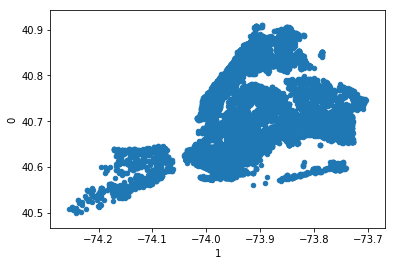

In [25]:
fig=dfcalllocs.plot(kind='scatter', x=1, y=0)

### Pretty interesting, How could we make it more informative?

### Lets make the points very small


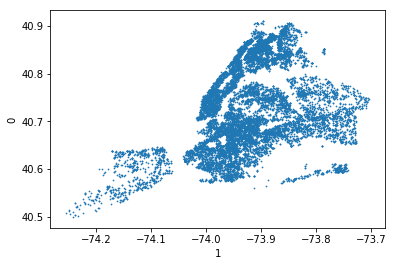

In [26]:
fig=dfcalllocs.plot(kind='scatter', x=1, y=0, s=.5)

### Or we could make them transparent


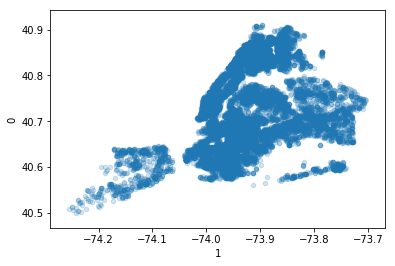

In [28]:
fig=dfcalllocs.plot(kind='scatter', x=1,y=0,alpha=.2)

### Other ideas, try color coding different types of calls
### Overlay on a map of the New York
### Have multiple plots for different types of calls

## What about the restaurant calls?


We don't have lat lons for restauarants, we would need to get them, but we could join their zipcode with 
a database that has the centroids of zipcodes in the US.

https://coolthingoftheday.blogspot.com/2008/04/free-us-zip-code-database-as-csv.html

OR, we could compute the average latitude and longitudes from the the 311 data base for each zipcode, or compute the average of the max(latitude)-min(latitude) and the same for the longitude.